In [46]:
#import libraries
import os
import glob
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

In [2]:
path = os.getcwd()
print(path)

c:\Users\AkhilVNairNair\Desktop\Data_Science_Project\Amazon_Web_scraped_data


In [4]:
csv_files = glob.glob(os.path.join(path, "*.csv"))
print(csv_files)

['c:\\Users\\AkhilVNairNair\\Desktop\\Data_Science_Project\\Amazon_Web_scraped_data\\Cleaned AmazonWebScraped Data(10-02-2021).csv', 'c:\\Users\\AkhilVNairNair\\Desktop\\Data_Science_Project\\Amazon_Web_scraped_data\\Cleaned AmazonWebScraped Data(10-05-2021).csv', 'c:\\Users\\AkhilVNairNair\\Desktop\\Data_Science_Project\\Amazon_Web_scraped_data\\Cleaned AmazonWebScraped Data(10-06-2021).csv', 'c:\\Users\\AkhilVNairNair\\Desktop\\Data_Science_Project\\Amazon_Web_scraped_data\\Cleaned AmazonWebScraped Data(10-08-2021).csv', 'c:\\Users\\AkhilVNairNair\\Desktop\\Data_Science_Project\\Amazon_Web_scraped_data\\Cleaned AmazonWebScraped Data(9-22-2021).csv', 'c:\\Users\\AkhilVNairNair\\Desktop\\Data_Science_Project\\Amazon_Web_scraped_data\\Cleaned AmazonWebScraped Data(9-23-2021).csv', 'c:\\Users\\AkhilVNairNair\\Desktop\\Data_Science_Project\\Amazon_Web_scraped_data\\Cleaned AmazonWebScraped Data(9-24-2021).csv', 'c:\\Users\\AkhilVNairNair\\Desktop\\Data_Science_Project\\Amazon_Web_scraped_

In [5]:
great_indian_sales_phone = [pd.read_csv(file, low_memory=False) for file in csv_files]
great_indian_sales_phone = pd.concat(great_indian_sales_phone)
print(great_indian_sales_phone.head())
great_indian_sales_phone.shape

             Date Brand             Model             Color  RAM    ROM  \
0  10/2/2021 0:00  iQOO  iQOO 7 Legend 5G             White  8GB  128GB   
1  10/2/2021 0:00  iQOO        iQOO Z3 5G        Cyber Blue  8GB  256GB   
2  10/2/2021 0:00    Mi             Mi 10       Coral Green  8GB  128GB   
3  10/2/2021 0:00    Mi             Mi 10       Coral Green  8GB  256GB   
4  10/2/2021 0:00    Mi         Mi 11X 5G  Celestial Silver  6GB  128GB   

   Ratings out of 5      Price Sponsored  
0               4.3  ₹39990.00        No  
1               4.3  ₹20990.00        No  
2               4.0  ₹49999.00        No  
3               4.0  ₹54999.00        No  
4               4.0  ₹26999.00        No  


(888, 9)

In [6]:
great_indian_sales_phone.dtypes

Date                 object
Brand                object
Model                object
Color                object
RAM                  object
ROM                  object
Ratings out of 5    float64
Price                object
Sponsored            object
dtype: object

In [16]:
#Converting Date Column to "Date" datatype
great_indian_sales_phone["Date"] =  pd.to_datetime(great_indian_sales_phone['Date'])


In [17]:
great_indian_sales_phone["Date"]

0    2021-10-02
1    2021-10-02
2    2021-10-02
3    2021-10-02
4    2021-10-02
        ...    
43   2021-09-30
44   2021-09-30
45   2021-09-30
46   2021-09-30
47   2021-09-30
Name: Date, Length: 888, dtype: datetime64[ns]

In [18]:
great_indian_sales_phone.dtypes

Date                datetime64[ns]
Brand                       object
Model                       object
Color                       object
RAM                         object
ROM                         object
Ratings out of 5           float64
Price                       object
Sponsored                   object
dtype: object

In [19]:
great_indian_sales_phone.shape

(888, 9)

In [26]:
#Replacing the currency symbol 
great_indian_sales_phone["Price"]= great_indian_sales_phone["Price"].str.replace('₹','')


In [30]:
#Converting Price column to float datatype
great_indian_sales_phone["Price"] =great_indian_sales_phone["Price"].astype("float64")

In [31]:
great_indian_sales_phone.dtypes

Date                datetime64[ns]
Brand                       object
Model                       object
Color                       object
RAM                         object
ROM                         object
Ratings out of 5           float64
Price                      float64
Sponsored                   object
dtype: object

In [33]:
#Missing values in each column
great_indian_sales_phone.isnull().sum()

Date                0
Brand               0
Model               0
Color               0
RAM                 0
ROM                 0
Ratings out of 5    0
Price               0
Sponsored           0
dtype: int64

In [39]:
print(len(great_indian_sales_phone["Brand"].unique()))
print(len(great_indian_sales_phone["Model"].unique()))

13
139


We have 13 Phone Brands with 139 Models.
Also among these 139 models there are other specs that we are missing out currently.
Because the Models come with specs like Color, Rom, Ram and Ratings.


To get the exact number of Models, we need to merge the Model Name, Color, RAM, ROM and create a new column and add it to DataFrame.

Create a Model id column mapping to the above column.

In [41]:
great_indian_sales_phone["Model_Specs"] = great_indian_sales_phone[["Model","Color","RAM","ROM"]].agg('|'.join, axis=1)


In [43]:
great_indian_sales_phone.head()

,Date,Brand,Model,Color,RAM,ROM,Ratings out of 5,Price,Sponsored,Model_Specs
0,2021-10-02,iQOO,iQOO 7 Legend 5G,White,8GB,128GB,4.3,39990.0,No,iQOO 7 Legend 5G|White|8GB|128GB
1,2021-10-02,iQOO,iQOO Z3 5G,Cyber Blue,8GB,256GB,4.3,20990.0,No,iQOO Z3 5G|Cyber Blue|8GB|256GB
2,2021-10-02,Mi,Mi 10,Coral Green,8GB,128GB,4.0,49999.0,No,Mi 10|Coral Green|8GB|128GB
3,2021-10-02,Mi,Mi 10,Coral Green,8GB,256GB,4.0,54999.0,No,Mi 10|Coral Green|8GB|256GB
4,2021-10-02,Mi,Mi 11X 5G,Celestial Silver,6GB,128GB,4.0,26999.0,No,Mi 11X 5G|Celestial Silver|6GB|128GB


In [45]:
len(great_indian_sales_phone["Model_Specs"].unique())

374

We now can see 374 models with Unique specs

In [66]:
great_indian_sales_phone.groupby(["Brand","Model"]).size()

Brand   Model             
Mi      MI 10T 5G              1
        MI 10T Pro 5G          1
        Mi 10                  4
        Mi 10i 5G              7
        Mi 11X 5G             23
                              ..
realme  realme U1              2
        realme narzo 30        3
        realme narzo 30 5G     2
        realme narzo 50A      11
        realme narzo 50i       9
Length: 148, dtype: int64

Creating a Scatter Plot to find the relationship between Review and the Price of phones

<AxesSubplot:xlabel='Price', ylabel='Ratings out of 5'>

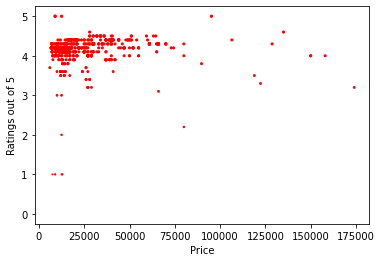

In [71]:
review = great_indian_sales_phone["Ratings out of 5"]
price = great_indian_sales_phone["Price"]
brand = great_indian_sales_phone["Brand"]

great_indian_sales_phone.plot.scatter(x= "Price", y = "Ratings out of 5", s = "Ratings out of 5", c = 'red')

From the Plot we get to see that:
1. Most of the highly rated phones ranging from 4 to 4.5 are in the price range of 0 to 50K
2. We see only two dots at 5 which could explain the number of reviews provided for the particular phones were less compared to other phones, this might explain that those Phones could be new to Amazon portal.
3. We see couple of dots at the lower rating on 1 and 2. This could mean that the phones were not that popular when compared to other phones within the same price range which might also have better features.
4. Ratings for prices above 125k are seen to be in mid range, between 3 to 4, which means that despite being categorized under high price range, the ratings are average. This could mean that the very few would  purchase a high price range phones and are not too SATISFIED with it.

In [73]:
great_indian_sales_phone.to_csv("android_phone_data.csv")

Ending the notebook here. Will be building a database in SQL and provide insights using a Power BI Dashboard.